# Exercise: Using `matplotlib` to plot 

Having one variable on a chart is good, but is two better? In this exercise, you'll practice adding two variables to the same chart. You will also learn how to create a chart that has two different graphs on it on the same figure!

**Download historical data for 2 years from one ticker**

Use the YFinance package to download 2 years of data for any ticker you'd like. 

In [25]:
import yfinance as yf

In [26]:
stock_ticker = 'AAPL'
start_date = '2020-01-01' # use format YYYY-MM-DD
end_date = '2024-01-02'
data = yf.download(stock_ticker, start=start_date, end=end_date, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


**Calculate the 20-day and 50-day moving average**

Use Pandas methods to calculate the 20-day and 50-day moving averages for your ticker.

In [27]:
data['MA_20'] = data['Close'].ewm(span=20).mean()
data['MA_50'] = data['Close'].ewm(span=50).mean()

**Plot the daily and moving average data on the same plot**

Use `matplotlib` and plot all 3 of these variables on the same line plot: closing price, 20-day moving average, and 50-day moving average. 

Make sure to use a different color for each variable. You can also practice adding a title and x-axis and y-axis labels to your chart. Optionally, you can add gridlines. 

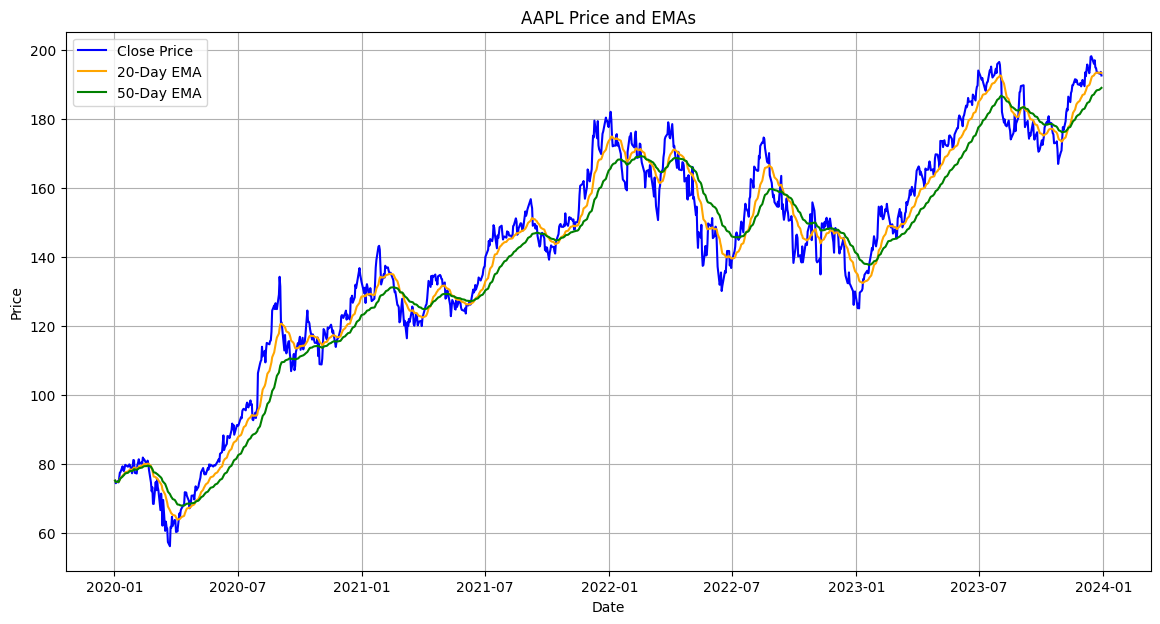

In [28]:
# make plot with 3 lines on it

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA_20'], label='20-Day EMA', color='orange')
plt.plot(data['MA_50'], label='50-Day EMA', color='green')
plt.title(f'{stock_ticker} Price and EMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

**Create plot with 2 subplots**

In this challenge, you'll be adding two different graphs to the same figure! This means that you'll have two different charts in one image. 

To do this in `matplotlib`, you'll be using the axes attribute of the `figure`. Recall that the `figure` is the canvas on which you draw your plots. You'll use a single figure, but add multiple axes to it, then you can put a different graph in each axes. 

Note that you're creating not just a `fig` like before, but now you're creating both a `fig` and `axes`:
```python
fig, ax = plt.subplots( num_subplots, figsize=(x,y), sharerx=True/False)
```

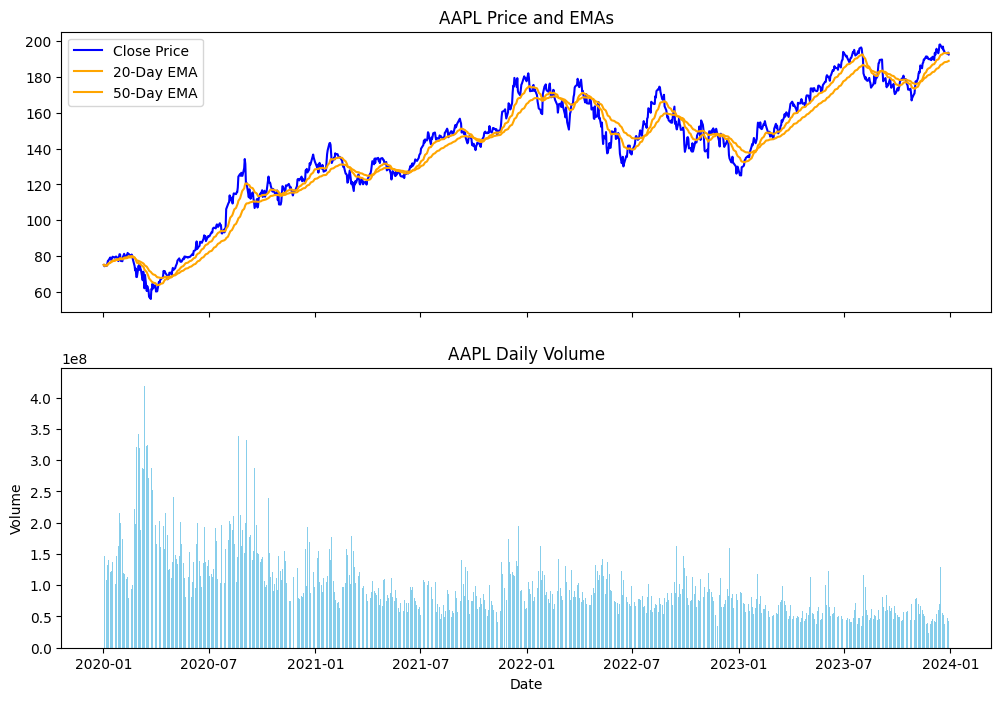

In [ ]:
# first create a figure with two axes
fig, ax = plt.subplots(2, figsize=(12, 8), sharex = True) # this is the foundation of creating multiple charts on one figure

# ax[0] creates the first chart. You'll want to add all 3 line plots to it: 
ax[0].plot(data['Close'], label='Close Price', color='blue') # add line chart for closing price
ax[0].plot(data['MA_20'], label='20-Day EMA', color='orange') # add line chart for 20-day moving average
ax[0].plot(data['MA_50'], label='50-Day EMA', color='orange') # add line chart for 50-day moving average
ax[0].set_title(f'{stock_ticker} Price and EMAs') # add a title for this graph
ax[0].legend()


# Second plot: Volume
#ax[1].bar(np.int(data.index), data['Volume'], label='Volume', color='skyblue', width=1.0) 
ax[1].bar(data.index, data[('Volume', 'AAPL')], label='Volume', color='skyblue', width=1.0) 

ax[1].set_title(f'{stock_ticker} Daily Volume')
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Volume")

plt.show()